In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("housing.csv")

In [5]:
X = df.drop('MEDV', axis=1).values
y = df['MEDV'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_features = X_train.shape[1]
weights = np.random.rand(n_features)
bias = 0
learning_rate = 0.01
epochs = 100

In [6]:
losses = []
for epoch in range(epochs):
    y_pred = np.dot(X_train, weights) + bias
    loss = np.mean((y_pred - y_train)**2)  # MSE Loss
    losses.append(loss)
    
    dw = (2/len(X_train)) * np.dot(X_train.T, (y_pred - y_train))
    db = (2/len(X_train)) * np.sum(y_pred - y_train)
    
    weights = weights - learning_rate * dw
    bias = bias - learning_rate * db

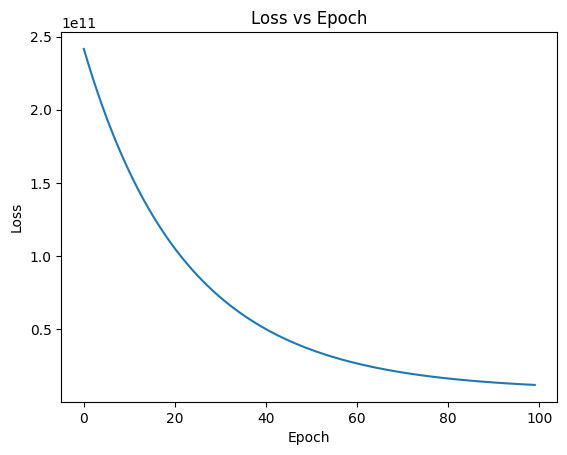

In [7]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.show()

In [8]:
y_pred_test = np.dot(X_test, weights) + bias
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
comparison_df

,Actual,Predicted
0,401100.0,281711.126334
1,501900.0,443206.009014
2,319200.0,354717.037552
3,147000.0,179766.952502
4,247800.0,276717.714620
...,...,...
93,405300.0,424936.212398
94,289800.0,335186.172662
95,518700.0,505108.882079
96,422100.0,403129.142320
